In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 📊 Insurance Cost Dataset Report

## 1. Dataset Overview  
This dataset contains information about individuals and their medical insurance charges.  
It can be used for **insurance cost prediction** and **risk analysis**.  

**Columns:**
- `age`: Age of the individual (years).  
- `sex`: Gender of the individual (`male` / `female`).  
- `bmi`: Body Mass Index (BMI), a measure of body fat based on height and weight.  
- `children`: Number of children/dependents covered by insurance.  
- `smoker`: Whether the individual is a smoker (`yes` / `no`).  
- `region`: Residential region of the individual in the U.S. (`northeast`, `northwest`, `southeast`, `southwest`).  
- `charges`: Medical insurance cost billed by the insurance company (in USD).  

---

## 2. Domain Knowledge – Insurance Context  
Insurance companies calculate premiums and payouts based on **risk assessment**.  
This dataset reflects important **risk factors**:

- **Age:**  
  - Older individuals typically have higher medical costs.  
  - Insurance charges tend to increase with age due to higher risk of chronic diseases.  

- **Sex:**  
  - Gender may influence healthcare usage patterns.  
  - In practice, regulations may limit gender-based premium differences.  

- **BMI (Body Mass Index):**  
  - High BMI indicates overweight/obesity, which increases the risk of diseases (diabetes, hypertension, heart disease).  
  - Individuals with higher BMI generally face higher insurance charges.  

- **Children:**  
  - More dependents can slightly increase costs due to family coverage.  
  - However, the effect is usually smaller compared to age, smoking, or BMI.  

- **Smoker:**  
  - One of the most significant cost drivers.  
  - Smokers are at much higher risk of serious health conditions → dramatically higher insurance charges.  

- **Region:**  
  - Medical costs vary by region due to differences in healthcare facilities, cost of living, and insurance market.  
  - Example: Southeast region often shows higher charges.  

- **Charges (Target Variable):**  
  - The actual cost billed to the insurance holder.  
  - This is the dependent variable we aim to predict in machine learning tasks.  

---

## 3. Potential Use Cases  
- **Predictive Modeling:**  
  Build regression or machine learning models to predict insurance charges for new individuals.  

- **Risk Assessment:**  
  Identify high-risk groups (e.g., smokers with high BMI) for targeted health programs.  

- **Policy Design:**  
  Insurance companies can use such analysis to design fair and sustainable premium structures.  

- **Health Awareness:**  
  Individuals can understand how lifestyle choices (like smoking, obesity) impact insurance costs.  

---

## 4. Example Analysis Directions  
- Correlation of features (e.g., smoker vs. charges).  
- Age vs. charges trend (cost increases with age).  
- Regional differences in insurance costs.  
- Impact of BMI on charges.  
- Machine learning models (Linear Regression, Random Forest, XGBoost) to predict `charges`.  

---

✅ **Summary:**  
This dataset is a classic example for studying **health insurance cost prediction**. It demonstrates how **demographic, lifestyle, and regional factors** influence medical expenses.  



In [2]:
df = pd.read_csv("insurance (1).csv")

In [3]:
df.sample(9)

,age,sex,bmi,children,smoker,region,charges
1090,47,male,36.190,0,yes,southeast,41676.08110
1120,23,female,31.400,0,yes,southwest,34166.27300
1192,58,female,32.395,1,no,northeast,13019.16105
1228,56,male,34.430,0,no,southeast,10594.22570
225,55,male,33.880,3,no,southeast,11987.16820
387,50,male,25.365,2,no,northwest,30284.64294
1008,25,male,24.985,2,no,northeast,23241.47453
418,64,male,39.160,1,no,southeast,14418.28040
652,48,female,31.130,0,no,southeast,8280.62270


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## EDA

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 300x300 with 0 Axes>

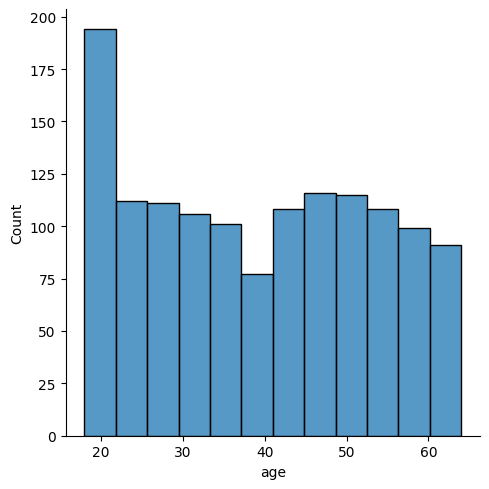

In [8]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='age')
plt.show()

In [9]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 300x300 with 0 Axes>

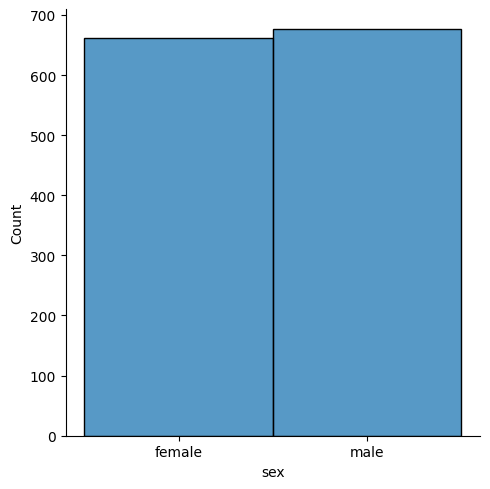

In [10]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='sex')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 300x300 with 0 Axes>

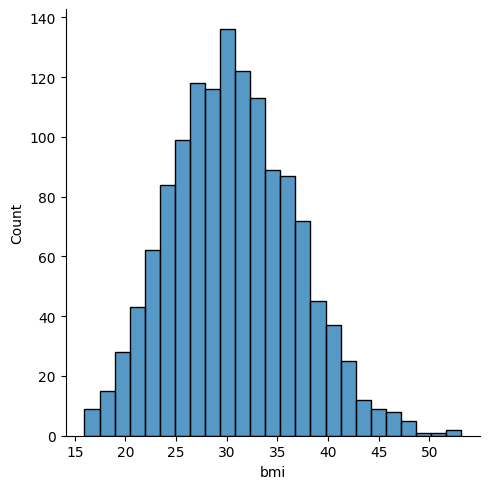

In [12]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='bmi')
plt.show()

In [13]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Figure size 300x300 with 0 Axes>

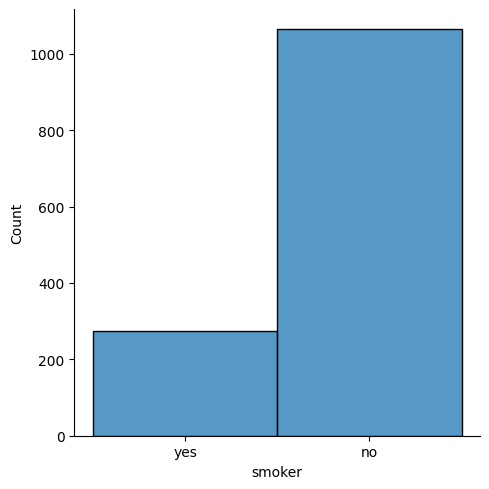

In [14]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='smoker')
plt.show()

In [15]:
# 

In [16]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 300x300 with 0 Axes>

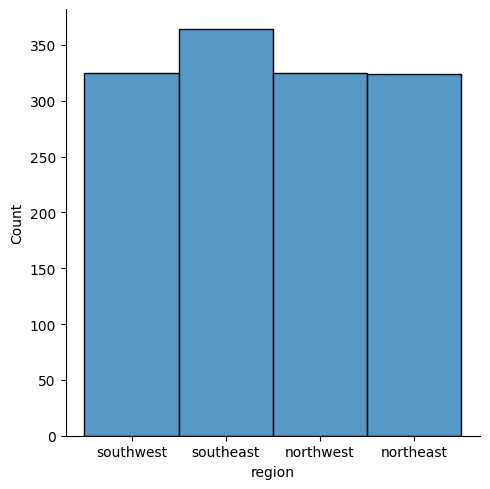

In [17]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='region')
plt.show()

<Figure size 300x300 with 0 Axes>

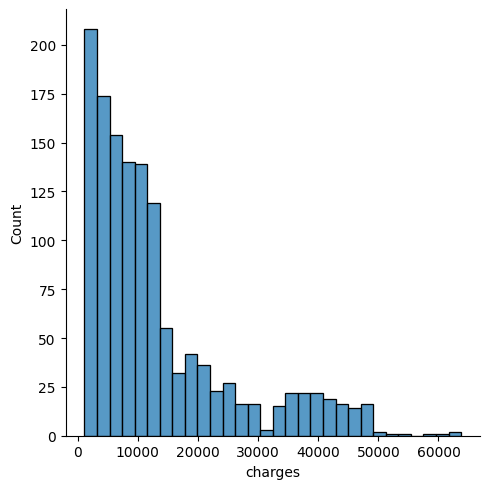

In [18]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='charges')
plt.show()

# 🔹 2. Bivariate Analysis (Two columns)

<Axes: xlabel='sex', ylabel='charges'>

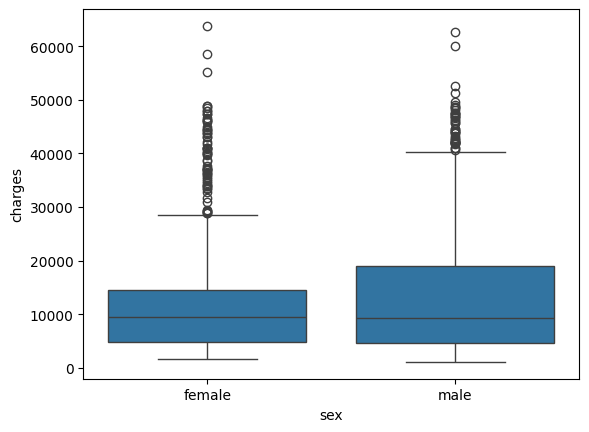

In [19]:
sns.boxplot( x = "sex" , y = "charges" , data  = df)

# 📊 Boxplot Analysis: Charges by Sex

| **Plot Feature**     | **Observation**                                                                 | **Deeper Insight**                                                                                  |
|-----------------------|---------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| **Median (Middle Line)** | The median charge for females (∼$9,500) is nearly identical to the median for males (∼$9,500). | Sex has virtually no impact on the typical cost. On average, a random male and a random female in the dataset have the same insurance cost. |
| **IQR (Box Height)**  | The interquartile range (middle 50% of data) is very similar, but the male box may be slightly taller and shifted up. | While the medians are the same, the charges for the middle-cost male population show a slightly greater spread or slightly higher values than the female population. |
| **Outliers**          | Both groups have a similar number of extreme high-cost outliers extending over $60,000. | Extreme high costs are not significantly driven by sex alone. These are likely the individuals in the high-cost bands observed in the Age plot, regardless of gender. |

---

✅ **Summary:**  
- The **distribution of charges is very similar between males and females**.  
- **Sex is not a strong predictor of insurance costs** compared to other factors like **smoking** or **BMI**.  


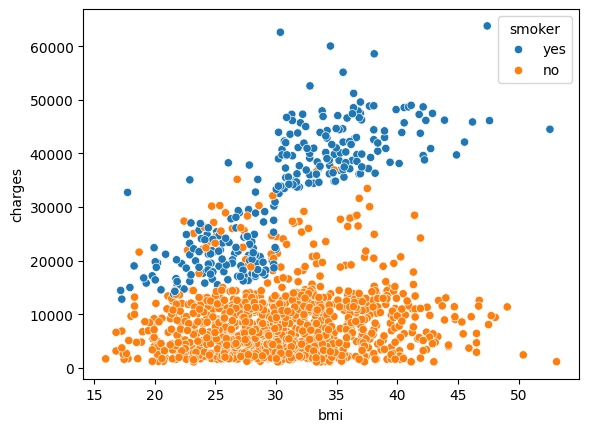

In [20]:
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df)
plt.show()

# 📊 Scatterplot Analysis: Charges vs BMI (Colored by Smoker Status)

### Separation by Color
The data is cleanly separated into two distinct, non-overlapping clusters based on the **smoker variable**.  
This indicates that **smoker status is the single most dominant factor driving high insurance charges**.  
It acts like a binary switch: individuals either fall into a low-cost group (non-smokers) or a high-cost group (smokers).  

### Non-Smokers (Orange Cluster)
For non-smokers, charges are mostly concentrated **below ~$17,000**.  
The trend with BMI is mild — as BMI increases, charges rise slightly, but the effect is weak.  
This shows that for the majority of the population, **medical charges remain relatively low**, and BMI only has a **minor influence**.  

### Smokers (Blue Cluster)
Smokers fall into a distinct high-cost group, with charges starting **above ~$15,000** and going up to **~$63,000**.  
Within this group, charges are significantly higher than those for non-smokers, regardless of BMI.  
This highlights that **being a smoker automatically places individuals into a high-cost bracket**.  

### Influence of BMI within Smokers
For smokers, the effect of BMI is much stronger compared to non-smokers.  
Charges **rise noticeably as BMI increases**, especially for BMI values **above 30 (obese range)**.  
This means that **high BMI combined with smoking leads to the highest possible insurance charges** in the dataset.  

---

✅ **Summary:**  
- **Smoker status is the strongest determinant** of medical charges.  
- **Non-smokers** → relatively low costs, weak link to BMI.  
- **Smokers** → very high costs, with BMI making the situation worse.  
- The **worst-case scenario**: smokers with high BMI → maximum charges in the dataset.  


C:\Users\sajan\AppData\Local\Temp\ipykernel_9988\2187477591.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="children", y="charges", data=df, ci=None, palette="pastel")
C:\Users\sajan\AppData\Local\Temp\ipykernel_9988\2187477591.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="children", y="charges", data=df, ci=None, palette="pastel")


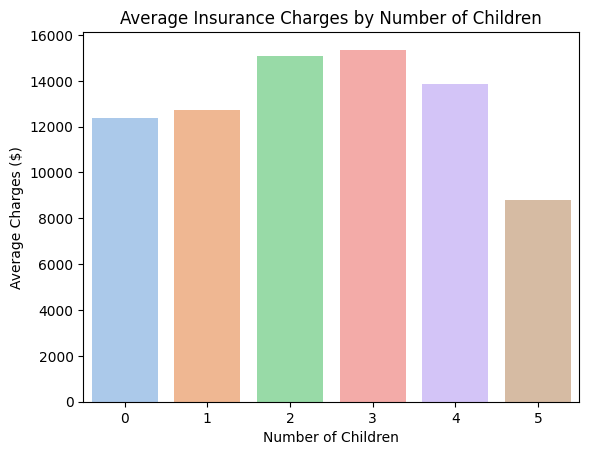

In [22]:
sns.barplot(x="children", y="charges", data=df, ci=None, palette="pastel")
plt.title("Average Insurance Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Average Charges ($)")
plt.show()

C:\Users\sajan\AppData\Local\Temp\ipykernel_9988\3243375319.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


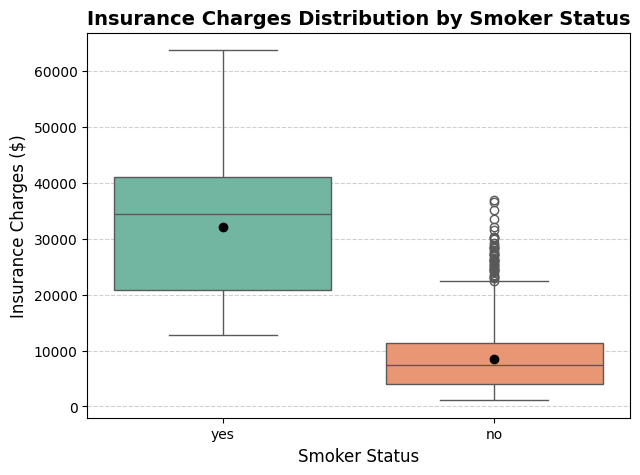

In [27]:
plt.figure(figsize=(7,5))

sns.boxplot(
    x="smoker", 
    y="charges", 
    data=df, 
    palette="Set2",   # nicer colors
    showmeans=True,   # show mean as well
    meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"}
)

plt.title("Insurance Charges Distribution by Smoker Status", fontsize=14, fontweight="bold")
plt.xlabel("Smoker Status", fontsize=12)
plt.ylabel("Insurance Charges ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)  # add light grid for readability
plt.show()


# 📊 Insurance Charges Distribution by Smoker Status: Analysis

The chart is a **box plot** (box-and-whisker plot) that visualizes the distribution of **Insurance Charges ($)** based on two categories of **Smoker Status**: **"yes" (smokers)** and **"no" (non-smokers).**

---

## 🔑 How to Read a Box Plot
Each box summarizes the distribution of data for a group using five key values (the "five-number summary"):

- **Median (Q2):** The horizontal line inside the box (50th percentile, middle of the data).  
- **Box Edges (Q1 & Q3):** The bottom (25th percentile) and top (75th percentile) edges of the box.  
- **Interquartile Range (IQR):** The length of the box, showing the spread of the middle 50% of the data.  
- **Whiskers:** Lines extending from the box to the minimum and maximum values (excluding outliers).  
- **Outliers:** Individual points beyond the whiskers, representing extreme values.  
- **Mean:** A black circle (∙), added using `showmeans=True`.  

---

## 💡 Key Insights from the Chart

### 1. Significant Cost Difference
- **Median Charges:**  
  - **Smokers:** ≈ **$34,500**  
  - **Non-Smokers:** ≈ **$9,500**  
- Smokers’ **median cost is more than 3× higher** than that of non-smokers.  
- The **median charge for smokers** is higher than the **upper quartile (75th percentile) of non-smokers** (~$12,000).  
- 👉 This shows smoking is the **single strongest factor** driving insurance costs.  

---

### 2. Distribution and Variability
- **Smokers:**  
  - Charges are widely spread, ranging from ~**$12,000** to over **$60,000**.  
  - Indicates high variability in costs among smokers.  
- **Non-Smokers:**  
  - Charges are tightly clustered between ~**$1,000** and **$12,000**.  
  - Much lower and narrower distribution compared to smokers.  

---

### 3. Mean vs Median
- **Smokers:** Mean (∙) is slightly below the median → distribution is slightly **left-skewed** (few extremely high values pulling the mean down).  
- **Non-Smokers:** Mean (∙) is slightly below the median → distribution is slightly **right-skewed** (few high-cost outliers pulling the mean up).  

---

### 4. Outliers
- **Smokers:** Few visible outliers → costs are consistently high.  
- **Non-Smokers:** Several outliers above the whisker → likely individuals with serious non-smoking-related conditions.  

---

## 🚀 Conclusion
The box plot **clearly demonstrates the massive impact of smoking on insurance charges**:

- Smokers consistently face **dramatically higher costs** than non-smokers.  
- Even the **lowest smoker charges (~$12,000)** are higher than the **median of non-smokers (~$9,500)**.  
- Insurance companies would use this insight to justify **significantly higher premiums** for smokers.  

---


In [ ]:
Region vs Charges → Boxplot (compare costs across regions).

🔹 3. Multivariate Analysis (More than two columns)

See combined effects of multiple factors.

Age + Smoker vs Charges → Smokers at older age → very high charges.

BMI + Smoker vs Charges → Overweight smokers → extremely high costs.

Region + Smoker vs Charges → Regional variation among smokers.

Children + Age vs Charges → Family costs pattern.

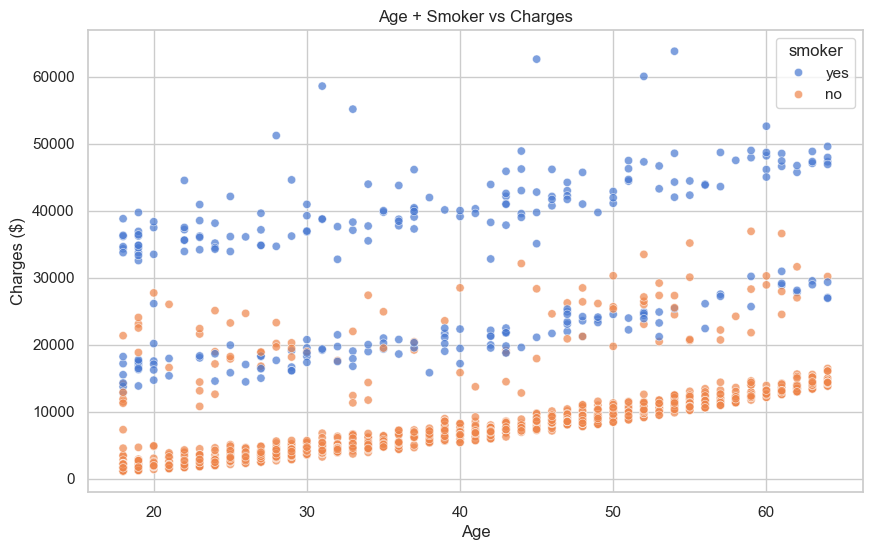

In [29]:
# Set style
sns.set(style="whitegrid", palette="muted")

# ------------------------------
# 1. Age + Smoker vs Charges
# ------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df, alpha=0.7)
plt.title("Age + Smoker vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.show()

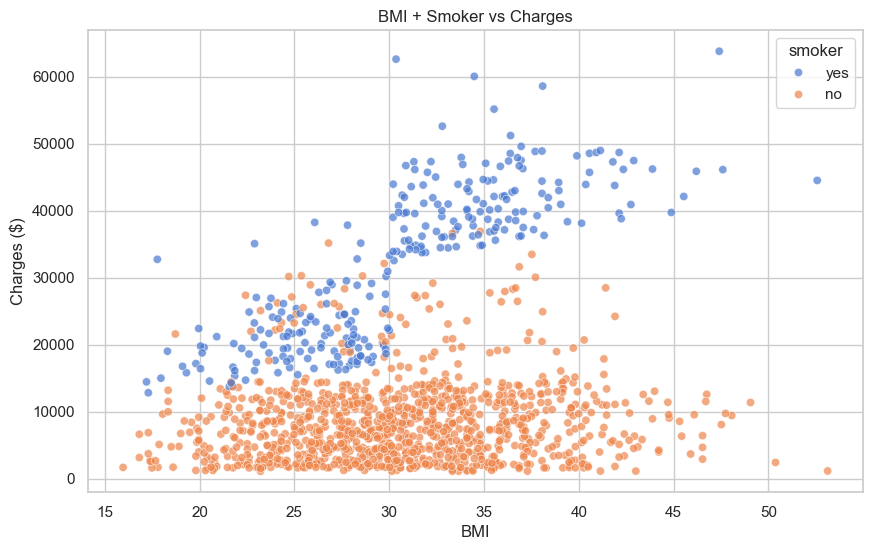

In [30]:
# Set style
sns.set(style="whitegrid", palette="muted")

# ------------------------------
# 2. BMI + Smoker vs Charges
# ------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, alpha=0.7)
plt.title("BMI + Smoker vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges ($)")
plt.show()


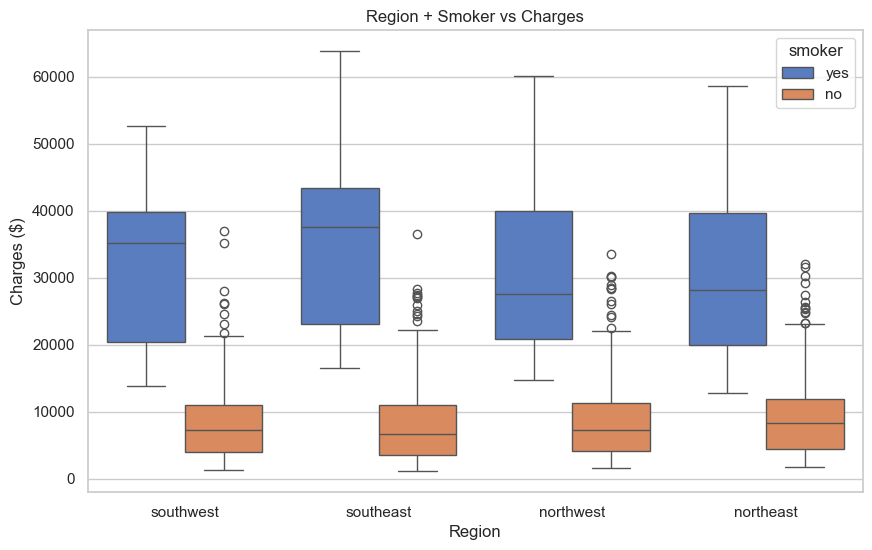

In [31]:
# ------------------------------
# 3. Region + Smoker vs Charges
# ------------------------------
plt.figure(figsize=(10,6))
sns.boxplot(x="region", y="charges", hue="smoker", data=df)
plt.title("Region + Smoker vs Charges")
plt.xlabel("Region")
plt.ylabel("Charges ($)")
plt.show()

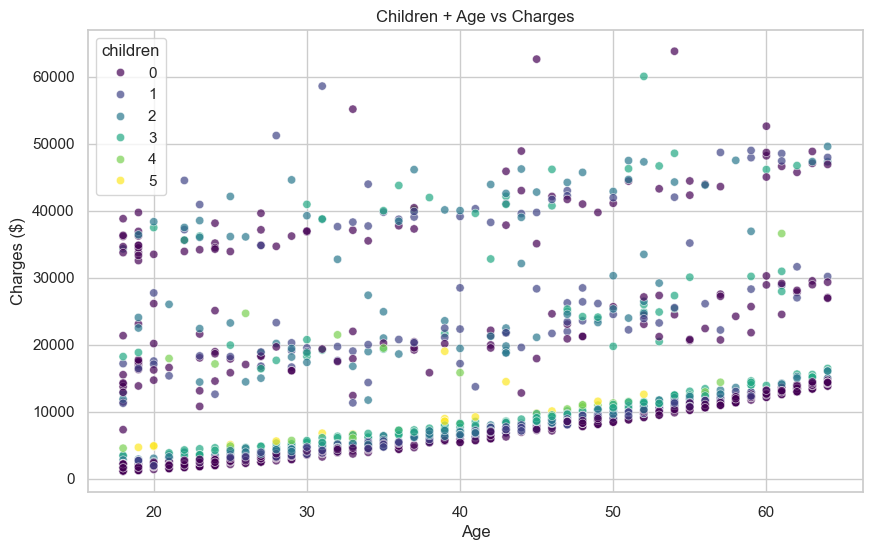

In [32]:
# ------------------------------
# 4. Children + Age vs Charges
# ------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="charges", hue="children", palette="viridis", data=df, alpha=0.7)
plt.title("Children + Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.show()

In [ ]:
## Coonverting Vategorica Column into Numerical

In [36]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [37]:
df.replace({"sex" :{"male" : 0 , "female" : 1}},inplace = True)
df.replace({"smoker" :{"yes" : 0 , "no" : 1}},inplace = True)
df.replace({"region" :{"southeast" : 0 , "southwest" : 1,"northwest":2,"northeast":3}},inplace = True)

C:\Users\sajan\AppData\Local\Temp\ipykernel_9988\383955394.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"smoker" :{"yes" : 0 , "no" : 1}},inplace = True)
C:\Users\sajan\AppData\Local\Temp\ipykernel_9988\383955394.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"region" :{"southeast" : 0 , "southwest" : 1,"northwest":2,"northeast":3}},inplace = True)


In [38]:
df.sample(9)

,age,sex,bmi,children,smoker,region,charges
323,57,0,40.945,0,1,3,11566.30055
494,21,0,25.700,4,0,1,17942.10600
735,49,1,34.770,1,1,2,9583.89330
120,44,0,37.100,2,1,1,7740.33700
1325,61,0,33.535,0,1,3,13143.33665
744,50,0,26.410,0,1,2,8827.20990
895,61,1,44.000,0,1,1,13063.88300
543,54,1,47.410,0,0,0,63770.42801
478,21,0,36.850,0,1,0,1534.30450


In [39]:
### Train_test_split

In [41]:
x = df.drop("charges" , axis = 1)
y = df["charges"]

In [42]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [43]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [47]:
X_train , X_test , y_train , y_test = train_test_split( x , y , test_size =0.1 , random_state = 2)

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train , y_train) #80 per model will train

LinearRegression()

In [50]:
y_predict = lr.predict(X_test)

In [51]:
y_predict

array([ 1831.00128056, 12159.15610236, 10221.02957304,  1931.07889605,
        7708.32210916, 11362.71453869,  3226.18930032,  1380.14055226,
       12078.1278645 ,  9545.09206883, 11588.58647378,  5076.08579737,
       29657.97519822,  -722.90554201, 13063.66673311, 12602.30411806,
        4123.86093137,  7880.72658343, 28931.66363323,  3162.51691839,
       12519.748324  ,  2325.26699456, 34097.77374993, 32372.92091451,
       30147.66200688,  8594.13929241,  2529.58894932, 14902.45791073,
        6774.11912654,  2106.22614057,  9676.06641324,  5885.77299598,
        4266.22715745,  4644.67563944,  8608.61245099,  4914.24229626,
       30388.93753313,  6648.21466294, 27758.66407963, 13489.6156729 ,
         351.44237387, 28512.30416636,  7877.24048384,  1639.50750102,
       10302.9694382 ,  8050.16026729, 10992.48504884,  8023.50359127,
       10611.84955849, 13729.01898728,  5679.73245484,  -998.98532889,
       26638.5613963 , 37076.22859917,  7350.96806601, 18098.78497121,
      

In [54]:
r2_score(y_test , y_predict) # y_test is the data our model not seen yet

0.7058997983752827

In [55]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [ ]:
# Prediction System

In [64]:
input_df = (19	,1	,27.900	,0	,0	,1)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = lr.predict(input_df_reshaped)
print("Medical Insurance for this person is this :" ,prediction)

Medical Insurance for this person is this : [25925.06977975]


C:\Users\sajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [65]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=2)
rf.fit(X_train, y_train)

# Make predictions and check the new R2 score
y_predict_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_predict_rf)

print(f"Linear Regression R² Score: 0.7059") # Your original score
print(f"Random Forest R² Score: {r2_rf}")      # The new, likely higher score

Linear Regression R² Score: 0.7059
Random Forest R² Score: 0.7391387383137846


In [66]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit and transform your numerical columns
# Note: You should fit the scaler ONLY on the training data
X_train[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'rf' is your model instance
# Train the model using the scaled training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=2)

In [68]:
from sklearn.metrics import r2_score

# Make predictions on the scaled test data
y_predict = rf.predict(X_test)

# Calculate the R² score to see how well the model performed
r2 = r2_score(y_test, y_predict)
print(f"R² Score on Scaled Data: {r2:.4f}")

R² Score on Scaled Data: 0.7387
